# The Empirical Rule of Distribution

The empirical rule states that if a distribution of observations is normal:
- 68% of observations will be within a +- `sigma` range around the mean
- 95% of observations will be within a +- `2 * sigma` range around the mean
- 99.7% of observations will be within a +- `3 * sigma` range around the mean

In the following, some plots on that are shown using a simulated distribution.
More importantly, an experimental cumulative distribution function can be built, which maps the observation values with the pupulation proportion under the values (i.e., the integral function of the probability distribution function).

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(1738)

In [13]:
# Distribution of observations
# Hours of sleep
mu = 7
sigma = 1.7
Observations = [random.normalvariate(mu, sigma) for _ in range(100000)]

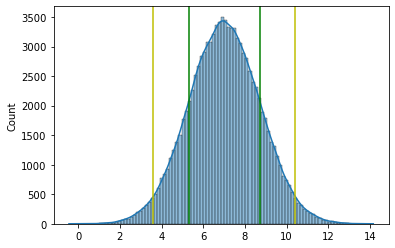

In [14]:
# Empirical rule
sns.histplot(Observations,kde=True,bins=100)
# 68% 
plt.axvline(np.mean(Observations) + np.std(Observations), color = "g")
plt.axvline(np.mean(Observations) - np.std(Observations), color = "g")
# 95%
plt.axvline(np.mean(Observations) + (np.std(Observations) * 2), color = "y")
plt.axvline(np.mean(Observations) - (np.std(Observations) * 2), color = "y")

In [15]:
# Quantiles
pd.Series(Observations).describe()

count    100000.000000
mean          7.002912
std           1.704275
min          -0.442182
25%           5.853662
50%           7.000002
75%           8.150411
max          14.149545
dtype: float64

In [16]:
# We draw 3 samples of 100 units/measurements each
SampleA = random.sample(Observations, 100)
SampleB = random.sample(Observations, 100)
SampleC = random.sample(Observations, 100)

<AxesSubplot:ylabel='Count'>

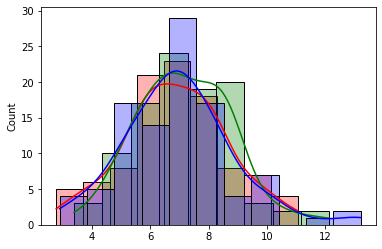

In [17]:
sns.histplot(SampleA, kde=True, color='r', alpha=0.3)
sns.histplot(SampleB, kde=True, color='g', alpha=0.3)
sns.histplot(SampleC, kde=True, color='b', alpha=0.3)

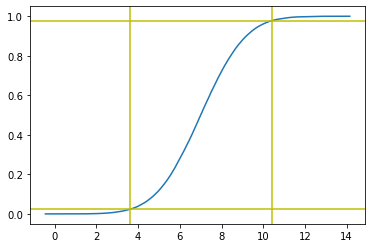

In [18]:
# We create an Empirical Cumulative Distribution Function
# for our observations
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf = ECDF(Observations)

plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.025, color = 'y', linestyle='-')
plt.axvline(x = np.mean(Observations) - (2 * np.std(Observations)), color = 'y', linestyle='-')

plt.axhline(y = 0.975, color = 'y', linestyle='-')
plt.axvline(x = np.mean(Observations) + (2 * np.std(Observations)), color = 'y', linestyle='-')

In [26]:
# Note that ecdf.y is an array of 100001 elements, equally spaced from 0 to 1!
# Each step is 0.00001; the array goes from 0.0 to 1.0
# Thus, ecdf.x is the mapping for each of the fixed ecdf.y values
ecdf.y.shape

(100001,)

In [27]:
np.min(np.argwhere(ecdf.y > 0.01)) # 0.001 * 100000 + 1 = 1001

1001

In [28]:
np.sum(np.linspace(0,1,num=100001)-ecdf.y) # 0

1.9163330793633797e-12

In [32]:
# Threshold observation value
# for which at least Y = 90% of the population
# has that or a smaller observation value
# Interpretation: 1-0.9 = 10% of the population sleeps longer than 9.18h
y = int(0.9 * 100000) + 1
ecdf.x[y]

9.188899425581543